<a href="https://colab.research.google.com/github/umihai31/Python/blob/main/BTC_Price_SP500_DXY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [55]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [45]:


# Define the symbols
symbols = ['^GSPC', 'DX-Y.NYB', 'BTC-USD']

# Set the start and end dates for historical data

start_date = '2007-01-01'
end_date = '2024-01-01'

data_uncleaned = yf.download(symbols,start = start_date, end = end_date)

[*********************100%%**********************]  3 of 3 completed


In [46]:
data_uncleaned

Price          Adj Close                                  Close              \
Ticker           BTC-USD    DX-Y.NYB        ^GSPC       BTC-USD    DX-Y.NYB   
Date                                                                          
2007-01-02           NaN   83.199997          NaN           NaN   83.199997   
2007-01-03           NaN   83.919998  1416.599976           NaN   83.919998   
2007-01-04           NaN   84.320000  1418.339966           NaN   84.320000   
2007-01-05           NaN   84.629997  1409.709961           NaN   84.629997   
2007-01-08           NaN   84.599998  1412.839966           NaN   84.599998   
...                  ...         ...          ...           ...         ...   
2023-12-27  43442.855469  100.989998  4781.580078  43442.855469  100.989998   
2023-12-28  42627.855469  101.230003  4783.350098  42627.855469  101.230003   
2023-12-29  42099.402344  101.330002  4769.830078  42099.402344  101.330002   
2023-12-30  42156.902344         NaN          NaN  42156.902344         NaN   
2023-12-31  42265.187500         NaN          NaN  42265.187500         NaN   

Price                            High                                    Low  \
Ticker            ^GSPC       BTC-USD    DX-Y.NYB        ^GSPC       BTC-USD   
Date                                                                           
2007-01-02          NaN           NaN   83.610001          NaN           NaN   
2007-01-03  1416.599976           NaN   84.040001  1429.420044           NaN   
2007-01-04  1418.339966           NaN   84.389999  1421.839966           NaN   
2007-01-05  1409.709961           NaN   84.809998  1418.339966           NaN   
2007-01-08  1412.839966           NaN   84.839996  1414.979980           NaN   
...                 ...           ...         ...          ...           ...   
2023-12-27  4781.580078  43683.160156  101.570000  4785.390137  42167.582031   
2023-12-28  4783.350098  43804.781250  101.300003  4793.299805  42318.550781   
2023-12-29  4769.830078  43124.324219  101.419998  4788.430176  41424.062500   
2023-12-30          NaN  42584.125000         NaN          NaN  41556.226562   
2023-12-31          NaN  42860.937500         NaN          NaN  41998.253906   

Price                                        Open                           \
Ticker        DX-Y.NYB        ^GSPC       BTC-USD    DX-Y.NYB        ^GSPC   
Date                                                                         
2007-01-02   83.150002          NaN           NaN   83.459999          NaN   
2007-01-03   83.169998  1407.859985           NaN   83.269997  1418.030029   
2007-01-04   83.839996  1408.430054           NaN   83.910004  1416.599976   
2007-01-05   84.150002  1405.750000           NaN   84.290001  1418.339966   
2007-01-08   84.489998  1403.969971           NaN   84.639999  1409.260010   
...                ...          ...           ...         ...          ...   
2023-12-27  100.830002  4768.899902  42518.468750  101.550003  4773.450195   
2023-12-28  100.620003  4780.979980  43468.199219  100.870003  4786.439941   
2023-12-29  101.070000  4751.990234  42614.644531  101.199997  4782.879883   
2023-12-30         NaN          NaN  42091.753906         NaN          NaN   
2023-12-31         NaN          NaN  42152.097656         NaN          NaN   

Price             Volume                         
Ticker           BTC-USD DX-Y.NYB         ^GSPC  
Date                                             
2007-01-02           NaN      0.0           NaN  
2007-01-03           NaN      0.0  3.429160e+09  
2007-01-04           NaN      0.0  3.004460e+09  
2007-01-05           NaN      0.0  2.919400e+09  
2007-01-08           NaN      0.0  2.763340e+09  
...                  ...      ...           ...  
2023-12-27  2.526094e+10      0.0  2.748450e+09  
2023-12-28  2.299209e+10      0.0  2.698860e+09  
2023-12-29  2.600002e+10      0.0  3.126060e+09  
2023-12-30  1.601393e+10      NaN           NaN  
2023-12-31  1.639750e+10     

In [47]:
data_uncleaned.columns

MultiIndex([('Adj Close',  'BTC-USD'),
            ('Adj Close', 'DX-Y.NYB'),
            ('Adj Close',    '^GSPC'),
            (    'Close',  'BTC-USD'),
            (    'Close', 'DX-Y.NYB'),
            (    'Close',    '^GSPC'),
            (     'High',  'BTC-USD'),
            (     'High', 'DX-Y.NYB'),
            (     'High',    '^GSPC'),
            (      'Low',  'BTC-USD'),
            (      'Low', 'DX-Y.NYB'),
            (      'Low',    '^GSPC'),
            (     'Open',  'BTC-USD'),
            (     'Open', 'DX-Y.NYB'),
            (     'Open',    '^GSPC'),
            (   'Volume',  'BTC-USD'),
            (   'Volume', 'DX-Y.NYB'),
            (   'Volume',    '^GSPC')],
           names=['Price', 'Ticker'])

In [48]:
nan_indices_btc = data_uncleaned['Close']['BTC-USD'].index[data_uncleaned['Close']['BTC-USD'].isna()]


In [49]:
# Clean Data
data_btc = data_uncleaned.drop(index = nan_indices_btc)
nan_indices_rest = data_btc['Close']['^GSPC'].index[data_btc['Close']['^GSPC'].isna()]
data = data_btc.drop(index = nan_indices_rest)

In [50]:
data

Price          Adj Close                                  Close              \
Ticker           BTC-USD    DX-Y.NYB        ^GSPC       BTC-USD    DX-Y.NYB   
Date                                                                          
2014-09-17    457.334015   84.699997  2001.569946    457.334015   84.699997   
2014-09-18    424.440002   84.320000  2011.359985    424.440002   84.320000   
2014-09-19    394.795990   84.800003  2010.400024    394.795990   84.800003   
2014-09-22    402.152008   84.669998  1994.290039    402.152008   84.669998   
2014-09-23    435.790985   84.660004  1982.770020    435.790985   84.660004   
...                  ...         ...          ...           ...         ...   
2023-12-22  43997.902344  101.699997  4754.629883  43997.902344  101.699997   
2023-12-26  42520.402344  101.470001  4774.750000  42520.402344  101.470001   
2023-12-27  43442.855469  100.989998  4781.580078  43442.855469  100.989998   
2023-12-28  42627.855469  101.230003  4783.350098  42627.855469  101.230003   
2023-12-29  42099.402344  101.330002  4769.830078  42099.402344  101.330002   

Price                            High                                    Low  \
Ticker            ^GSPC       BTC-USD    DX-Y.NYB        ^GSPC       BTC-USD   
Date                                                                           
2014-09-17  2001.569946    468.174011   84.709999  2010.739990    452.421997   
2014-09-18  2011.359985    456.859985   84.739998  2012.339966    413.104004   
2014-09-19  2010.400024    427.834991   84.800003  2019.260010    384.532013   
2014-09-22  1994.290039    406.915985   84.860001  2009.079956    397.130005   
2014-09-23  1982.770020    441.557007   84.760002  1995.410034    396.196991   
...                 ...           ...         ...          ...           ...   
2023-12-22  4754.629883  44367.957031  101.900002  4772.939941  43441.968750   
2023-12-26  4774.750000  43603.175781  101.769997  4784.720215  41676.488281   
2023-12-27  4781.580078  43683.160156  101.570000  4785.390137  42167.582031   
2023-12-28  4783.350098  43804.781250  101.300003  4793.299805  42318.550781   
2023-12-29  4769.830078  43124.324219  101.419998  4788.430176  41424.062500   

Price                                        Open                           \
Ticker        DX-Y.NYB        ^GSPC       BTC-USD    DX-Y.NYB        ^GSPC   
Date                                                                         
2014-09-17   83.940002  1993.290039    465.864014   84.099998  1999.300049   
2014-09-18   84.220001  2003.069946    456.859985   84.739998  2003.069946   
2014-09-19   84.230003  2006.589966    424.102997   84.279999  2012.739990   
2014-09-22   84.519997  1991.010010    399.100006   84.809998  2009.079956   
2014-09-23   84.370003  1982.770020    402.092010   84.690002  1992.780029   
...                ...          ...           ...         ...          ...   
2023-12-22  101.430000  4736.770020  43868.988281  101.760002  4753.919922   
2023-12-26  101.449997  4758.450195  43599.847656  101.650002  4758.859863   
2023-12-27  100.830002  4768.899902  42518.468750  101.550003  4773.450195   
2023-12-28  100.620003  4780.979980  43468.199219  100.870003  4786.439941   
2023-12-29  101.070000  4751.990234  42614.644531  101.199997  4782.879883   

Price             Volume                         
Ticker           BTC-USD DX-Y.NYB         ^GSPC  
Date                                             
2014-09-17  2.105680e+07      0.0  3.209420e+09  
2014-09-18  3.448320e+07      0.0  3.235340e+09  
2014-09-19  3.791970e+07      0.0  4.880220e+09  
2014-09-22  2.412760e+07      0.0  3.349670e+09  
2014-09-23  4.509950e+07      0.0  3.279350e+09  
...                  ...      ...           ...  
2023-12-22  2.102850e+10      0.0  3.046770e+09  
2023-12-26  3.002685e+10      0.0  2.513910e+09  
2023-12-27  2.526094e+10      0.0  2.748450e+09  
2023-12-28  2.299209e+10      0.0  2.698860e+09  
2023-12-29  2.600002e+10     

In [51]:
sp500_data = data.xs('^GSPC', axis = 1, level = 1)
btc_data = data.xs('BTC-USD', axis = 1, level = 1)
dxy_data = data.xs('DX-Y.NYB', axis = 1, level = 1)

Save data to CSV

In [52]:
sp500_data.to_csv('SP500_USD.csv', header = True)
dxy_data.to_csv('DXY.csv', header = True)
btc_data.to_csv('BTC_USD', header = True)

Corelation between closing price of BTC , SP500, and dxy

In [53]:
combined_data = pd.concat([sp500_data['Close'], dxy_data['Close'], btc_data['Close']] , axis = 1, keys = ['Sp500', 'Dxy', 'BTC'])
correlation_matrix = combined_data.corr()


Strong correlation: Absolute value close to 1 (e.g., 0.77 is considered strong).
Moderate correlation: Absolute value between 0.3 and 0.7.
Weak or no correlation: Absolute value close to 0 (e.g., 0.083 is considered weak or no correlation).

In [54]:
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
          Sp500       Dxy       BTC
Sp500  1.000000  0.317202  0.898489
Dxy    0.317202  1.000000  0.083219
BTC    0.898489  0.083219  1.000000


Time Series Plot

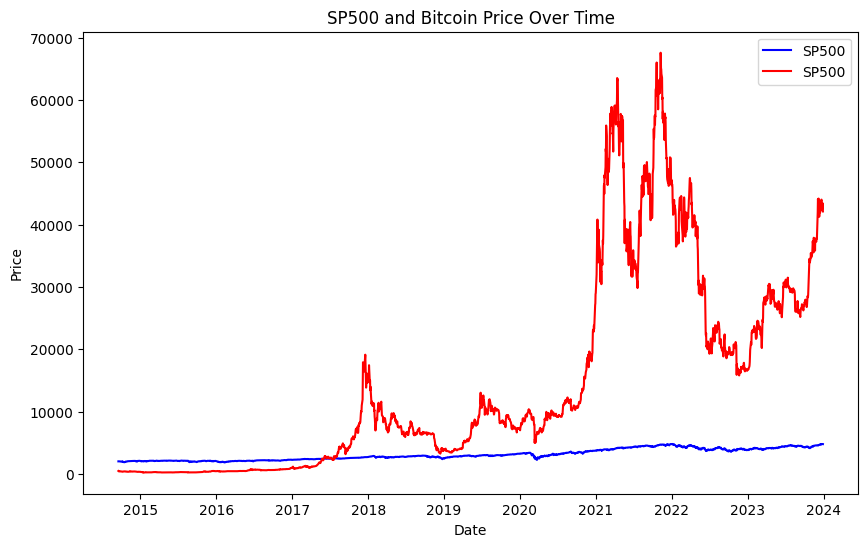

In [57]:
plt.figure(figsize = (10, 6))
plt.plot(sp500_data.index, sp500_data['Close'], label = 'SP500', color = 'blue')
plt.plot(sp500_data.index, btc_data['Close'], label = 'SP500', color = 'red')

plt.title('SP500 and Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Time Series ploting using dual y-axes

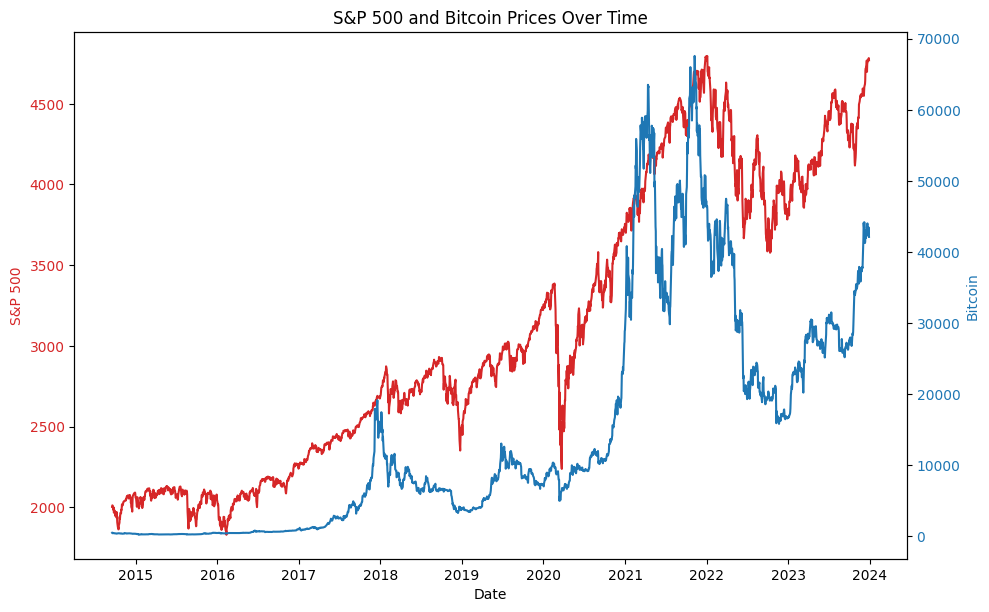

In [65]:
# Assuming sp500_data and bitcoin_data are already loaded
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500', color=color)
ax1.plot(sp500_data.index, sp500_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Bitcoin', color=color)
ax2.plot(btc_data.index, btc_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('S&P 500 and Bitcoin Prices Over Time')
plt.show()

Scatter Plot

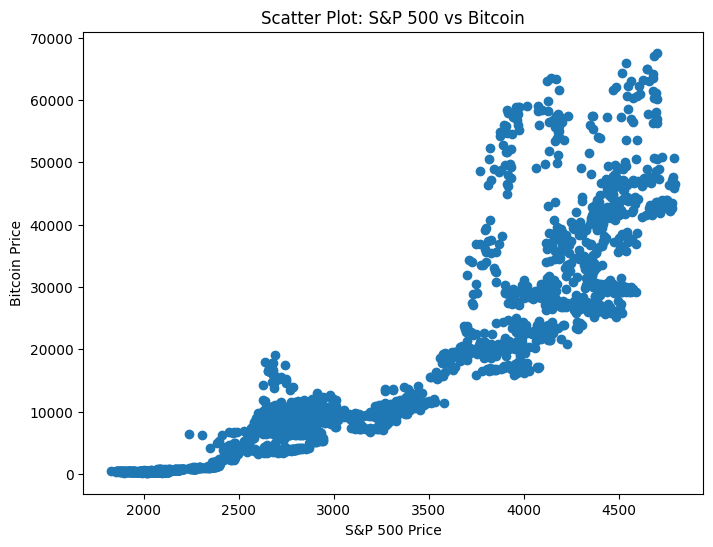

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(sp500_data['Close'], btc_data['Close'])
plt.title('Scatter Plot: S&P 500 vs Bitcoin')
plt.xlabel('S&P 500 Price')
plt.ylabel('Bitcoin Price')
plt.show()

Rolling Correlations

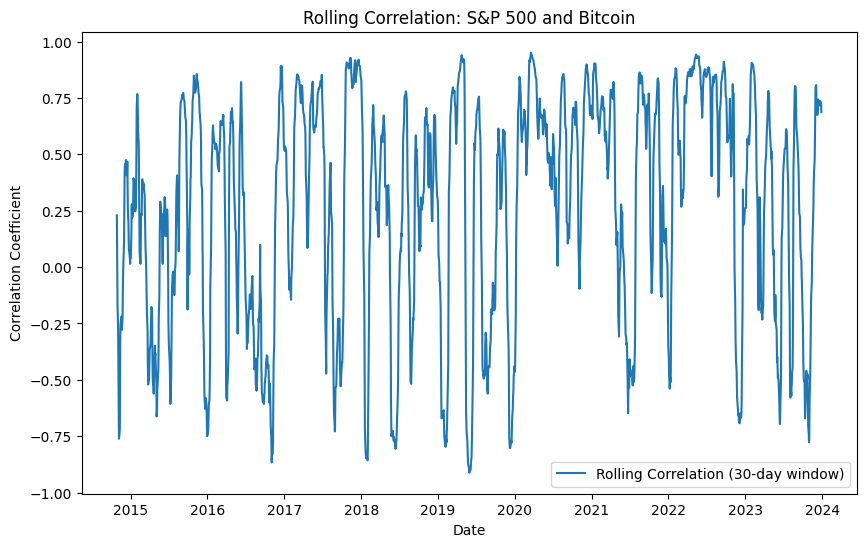

In [61]:
rolling_corr = sp500_data['Close'].rolling(window=30).corr(btc_data['Close'])
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation (30-day window)')
plt.title('Rolling Correlation: S&P 500 and Bitcoin')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.show()

Cross Corelation

In [64]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(sp500_data['Close'], btc_data['Close'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.8984888488764236
P-value: 0.0


Volatility Analysis:

In [63]:
sp500_volatility = sp500_data['Close'].pct_change().std()
bitcoin_volatility = btc_data['Close'].pct_change().std()
print("Volatility (standard deviation) - S&P 500:", sp500_volatility)
print("Volatility (standard deviation) - Bitcoin:", bitcoin_volatility)

Volatility (standard deviation) - S&P 500: 0.011458254608656402
Volatility (standard deviation) - Bitcoin: 0.04408320986685823


In [72]:
sp500_data['Close']

Date
2014-09-17    2001.569946
2014-09-18    2011.359985
2014-09-19    2010.400024
2014-09-22    1994.290039
2014-09-23    1982.770020
                 ...     
2023-12-22    4754.629883
2023-12-26    4774.750000
2023-12-27    4781.580078
2023-12-28    4783.350098
2023-12-29    4769.830078
Name: Close, Length: 2338, dtype: float64

Machine Learning Mode



Data split

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame({
    'sp500': sp500_data['Close'],
    'btc':btc_data['Close']
})

X = df['sp500']
y = df['btc']

X = X.values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)


In [77]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [78]:
prediction = model.predict(X_test)

In [80]:
mse = mean_squared_error(Y_test, prediction)
print(f"Mean Squared Error: ", mse)

Mean Squared Error:  51169494.53903301


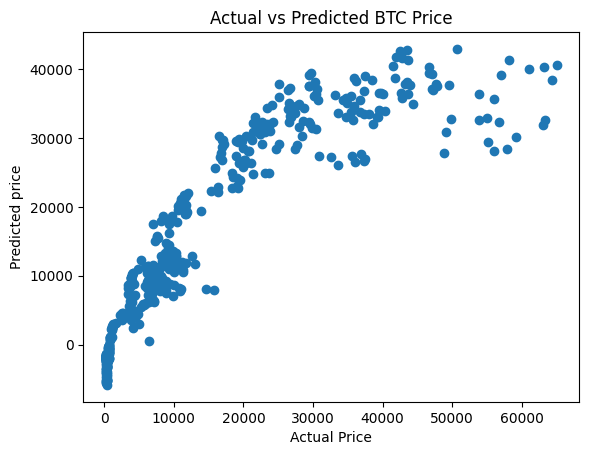

In [84]:
plt.scatter(Y_test, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted BTC Price')
plt.show()

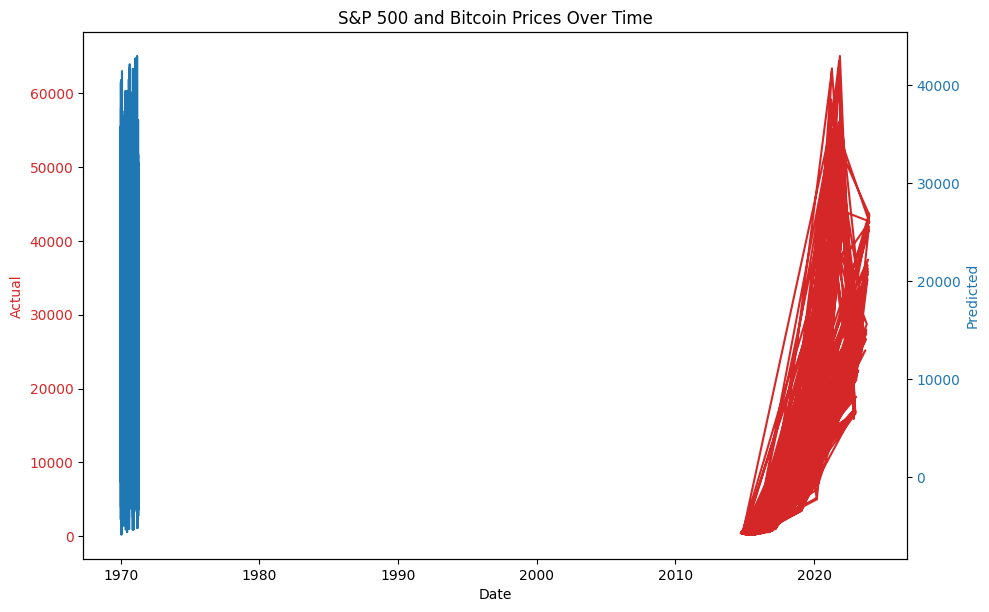

In [86]:
# Assuming sp500_data and bitcoin_data are already loaded
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Actual', color=color)
ax1.plot(Y_test , color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Predicted', color=color)
ax2.plot(prediction, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('S&P 500 and Bitcoin Prices Over Time')
plt.show()

In [87]:
Y_test[0]

574.1069946289062

In [90]:
prediction

array([-4.14515727e+02,  2.68137836e+04,  3.57693978e+04,  2.73827949e+04,
        9.04762879e+03, -4.31782617e+03,  1.47056697e+04,  4.03048700e+04,
        1.04542021e+04, -3.06064941e+03,  3.76156954e+04,  8.01363704e+03,
        9.08502002e+03,  4.05217440e+04,  1.12856174e+04, -1.08237059e+02,
        1.18331905e+04,  2.43873417e+04,  1.08294452e+04,  3.71872704e+04,
        1.74912355e+04,  1.07721128e+04,  8.63400044e+03, -5.87396645e+03,
        3.15697813e+04, -5.72718457e+02,  6.35679075e+03,  1.08414099e+04,
        3.79252929e+04,  7.48949439e+03,  1.90086517e+04,  3.31335674e+04,
        3.84599031e+04,  9.04297517e+03, -5.14741373e+03,  2.81645216e+04,
        4.51697249e+03,  4.14299339e+04,  8.96403812e+03,  3.23385412e+04,
       -3.22334347e+03,  1.19257557e+04,  9.69740695e+03, -2.12553791e+03,
        3.05829830e+04,  2.28047788e+04,  3.03332131e+04,  2.91644450e+04,
        3.57795327e+04, -2.75271134e+03, -2.54415257e+03,  2.17136169e+04,
        3.51140148e+03,  